In [ ]:
# Candice Huo 1005708370
# Instructor: Professor Shion Guha
# Course code: INF2178
# Course name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

# Technical Assignment 3

In [5]:
!pip install pingouin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pingouin import ancova
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [6]:
df = pd.read_csv("/content/INF2178_A3_data.csv")
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [7]:
df.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


In [8]:
# Convert the 'incomegroup' column to a categorical variable
df['incomegroup'] = pd.Categorical(df['incomegroup'])

In [9]:
# Use the 'fallreadingscore' column as the control variable, the 'springreadingscore' column as the dependent variable,
# and the 'incomegroup' column as the independent variable, fit the ANCOVA model
model = ols('springreadingscore ~ incomegroup + fallreadingscore', data=df).fit()

# Print the model summary
print(model.summary())

ancova(data=df, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:32:52   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5430      0.264  

,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,fallreadingscore,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [10]:
# Use covariate  as the control variable, the outcome  as the dependent variable, and the group  as the independent variable, fit ANCOVA model

model = ols('springmathscore ~ fallmathscore + incomegroup', data=df).fit()

# Print model summary
print(model.summary())

ancova(data=df, dv='springmathscore', covar='fallmathscore', between='incomegroup')

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:32:55   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.2011      0.199  

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [11]:
# Use covariate  as the control variable, the outcome  as the dependent variable, and the group  as the independent variable, fit ANCOVA model
model = ols('springgeneralknowledgescore ~ fallgeneralknowledgescore + incomegroup', data=df).fit()

# Print model summary
print(model.summary())

ancova(data=df, dv='springgeneralknowledgescore', covar='fallgeneralknowledgescore', between='incomegroup')

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                                 02:32:58   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1756.904469,2,56.908040,2.525291e-25,0.009451
1,fallgeneralknowledgescore,411876.768316,1,26682.269841,0.000000e+00,0.691049
2,Residual,184140.179925,11929,NaN,NaN,NaN


<ipython-input-12-493500b293f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


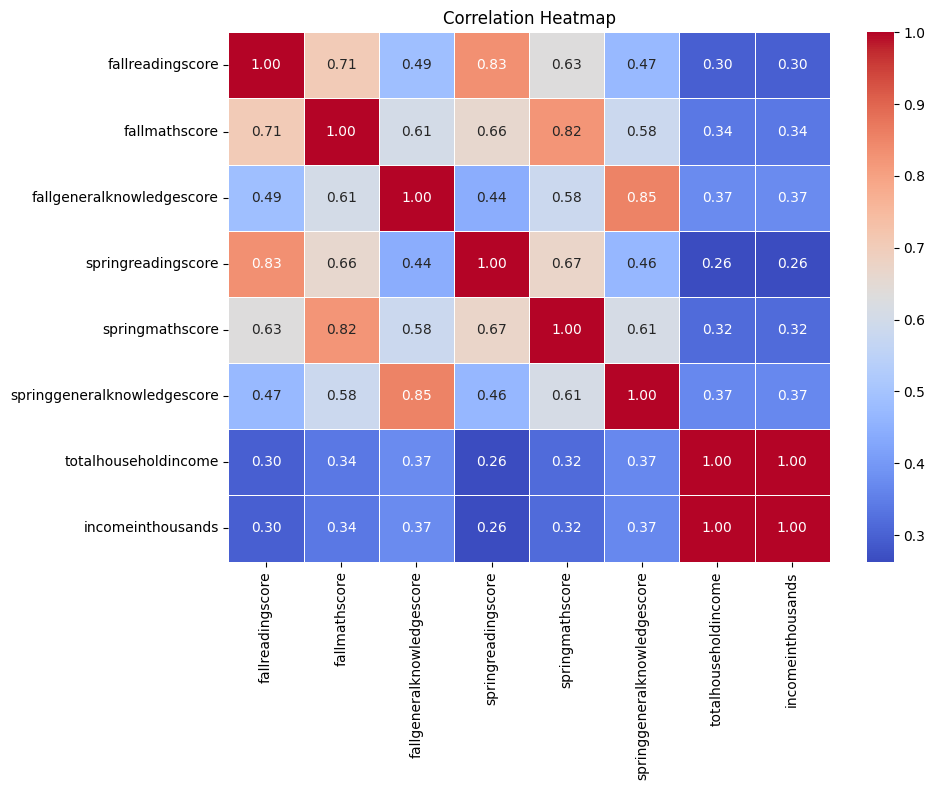

In [12]:
# Calculate the correlation coefficient between each variable
corr_matrix = df.corr()

# Set the size of the correlation graph
plt.figure(figsize=(10, 8))

# Draw the graph
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# Show graph
plt.tight_layout()
plt.show()

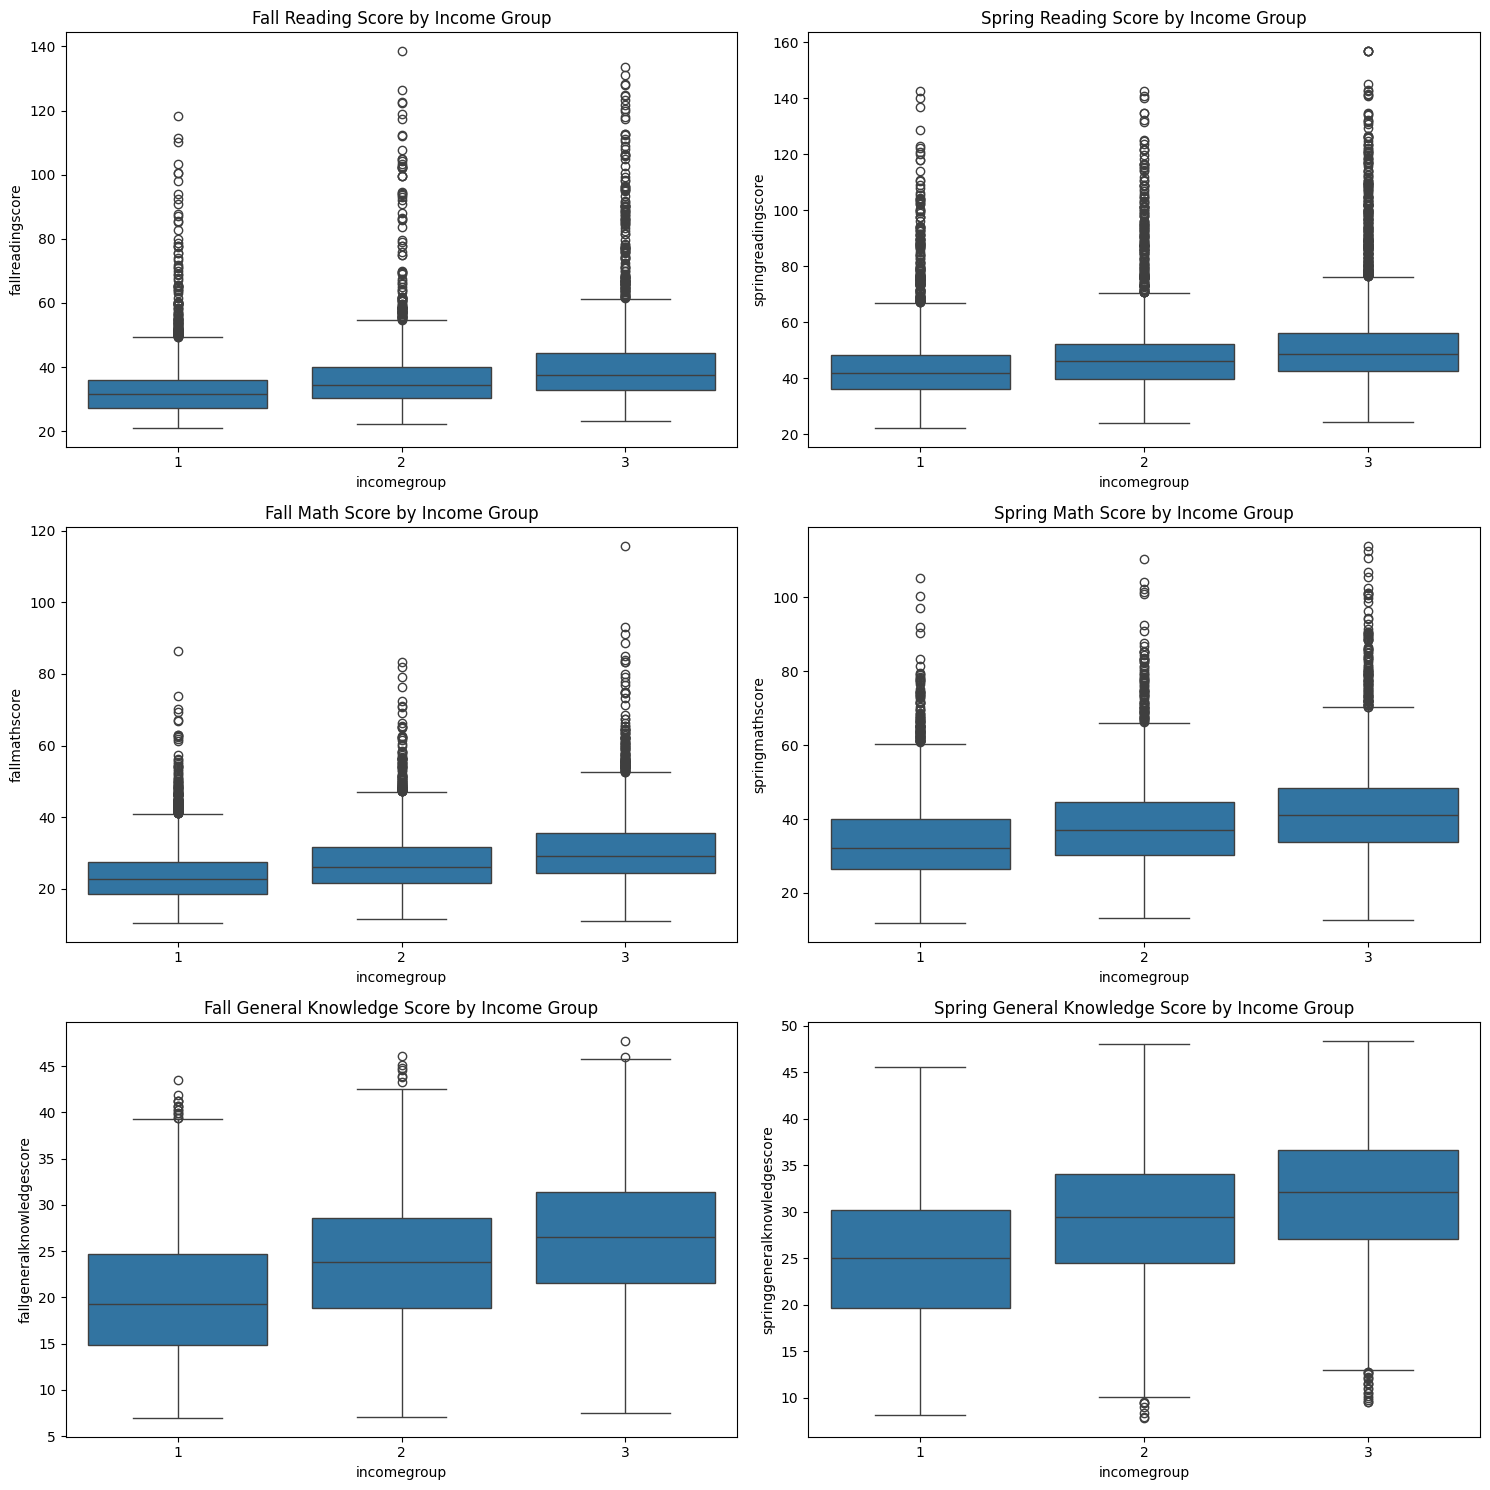

In [13]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot boxplots for fall readingscore and spring readingscore by income group
sns.boxplot(x='incomegroup', y='fallreadingscore', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Fall Reading Score by Income Group')

sns.boxplot(x='incomegroup', y='springreadingscore', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Spring Reading Score by Income Group')

sns.boxplot(x='incomegroup', y='fallmathscore', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Fall Math Score by Income Group')

sns.boxplot(x='incomegroup', y='springmathscore', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Spring Math Score by Income Group')

sns.boxplot(x='incomegroup', y='fallgeneralknowledgescore', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Fall General Knowledge Score by Income Group')

sns.boxplot(x='incomegroup', y='springgeneralknowledgescore', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Spring General Knowledge Score by Income Group')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


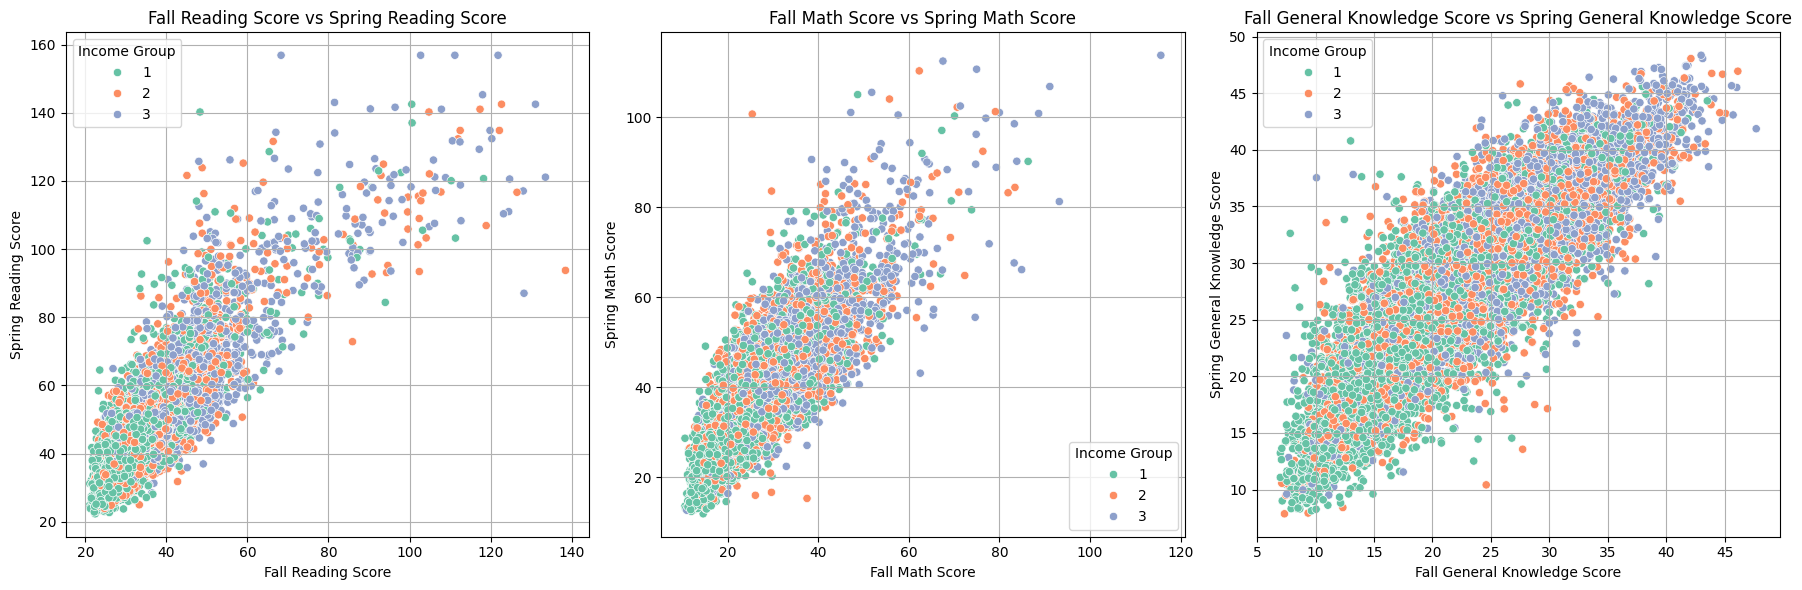

In [15]:
# Define color palette for income groups
color_palette = sns.color_palette("Set2", len(df['incomegroup'].unique()))

# Create scatter plots for fall and spring scores by income group
plt.figure(figsize=(18, 6))

# Scatter plot for Fall Reading Score vs Spring Reading Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='fallreadingscore', y='springreadingscore', hue='incomegroup', palette=color_palette, data=df)
plt.title('Fall Reading Score vs Spring Reading Score')
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')
plt.grid(True)
plt.legend(title='Income Group')

# Scatter plot for Fall Math Score vs Spring Math Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='fallmathscore', y='springmathscore', hue='incomegroup', palette=color_palette, data=df)
plt.title('Fall Math Score vs Spring Math Score')
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')
plt.grid(True)
plt.legend(title='Income Group')

# Scatter plot for Fall General Knowledge Score vs Spring General Knowledge Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='fallgeneralknowledgescore', y='springgeneralknowledgescore', hue='incomegroup', palette=color_palette, data=df)
plt.title('Fall General Knowledge Score vs Spring General Knowledge Score')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Spring General Knowledge Score')
plt.grid(True)
plt.legend(title='Income Group')

plt.tight_layout()
plt.show()

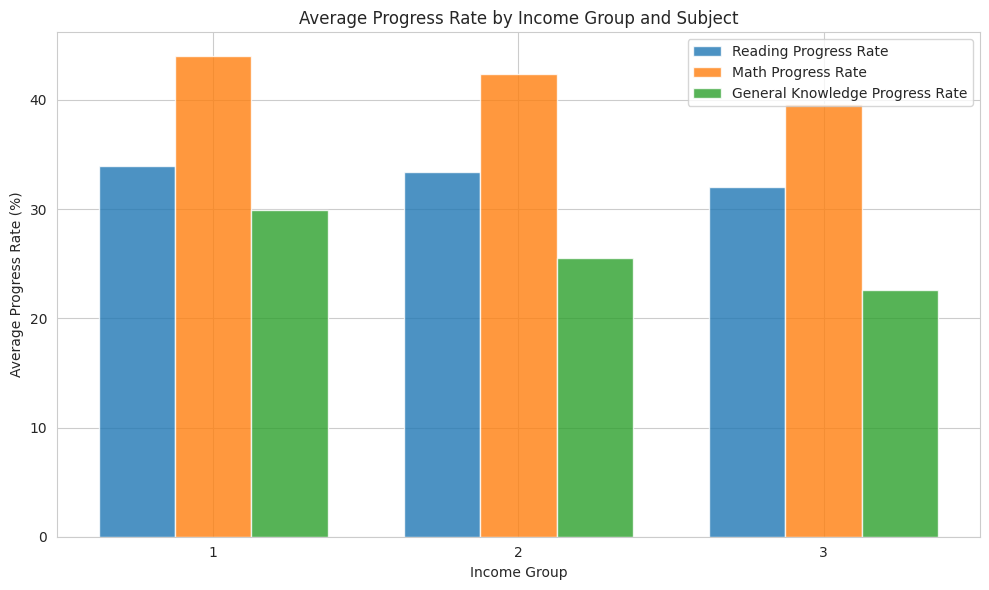

In [16]:
# Calculate the progress rate
df['reading_progress_rate'] = ((df['springreadingscore'] - df['fallreadingscore']) / df['fallreadingscore']) * 100
df['math_progress_rate'] = ((df['springmathscore'] - df['fallmathscore']) / df['fallmathscore']) * 100
df['general_knowledge_progress_rate'] = ((df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']) / df['fallgeneralknowledgescore']) * 100

# Group by income group and calculate the average rate of progress
group_progress_rates = df.groupby('incomegroup')[['reading_progress_rate', 'math_progress_rate', 'general_knowledge_progress_rate']].mean().reset_index()

# Set chart size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Sets the width of the bar chart
bar_width = 0.25

# Calculate the bar chart position for each discipline
indices = np.arange(len(group_progress_rates['incomegroup']))
reading_positions = indices - bar_width
math_positions = indices
general_knowledge_positions = indices + bar_width

# Plot a bar chart of the rate of progress
plt.bar(reading_positions, group_progress_rates['reading_progress_rate'], width=bar_width, label='Reading Progress Rate', alpha=0.8)
plt.bar(math_positions, group_progress_rates['math_progress_rate'], width=bar_width, label='Math Progress Rate', alpha=0.8)
plt.bar(general_knowledge_positions, group_progress_rates['general_knowledge_progress_rate'], width=bar_width, label='General Knowledge Progress Rate', alpha=0.8)

# Add titles and labels
plt.title('Average Progress Rate by Income Group and Subject')
plt.xlabel('Income Group')
plt.ylabel('Average Progress Rate (%)')
plt.legend()

# Set the X-axis scale and label
plt.xticks(indices, group_progress_rates['incomegroup'])

# Show plot
plt.tight_layout()
plt.show()